# create-anim

In [1]:
import babypandas as bpd
import numpy as np
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
set_matplotlib_formats("svg")
plt.style.use('ggplot')
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
height_and_weight = bpd.read_csv('data/height_and_weight.csv')
delays = bpd.read_csv('data/delays.csv')

In [3]:
def standardization_animation(vals, color='C0', x_min=None, x_max=None, y_max=None, dynamic_y=False, bins=10):
    from IPython.display import HTML
    fig = plt.figure(figsize=(10, 5), dpi=100, tight_layout=True)
    
    standardized = (vals - vals.mean()) / np.std(vals)
    
    if x_min:
        vals = vals[vals >= x_min]
    if x_max:
        vals = vals[vals <= x_max]
        
    if x_min is None:
        x_min = min(standardized.min(), standardized.min() * np.std(vals), vals.min()) - 10
    if x_max is None:
        x_max = max(standardized.max(), standardized.max() * np.std(vals), vals.max()) + 10
        
    if y_max is None:
        y_max = 0.45

    def plot_offset(i):
        nonlocal vals, color, x_min, x_max, y_max, bins
        # Routine: 200+ frames
        # First 50 frames: initial position
        # Next 75 frames: moving to centered location
        # Next 25 frames: wait there
        # Next 50 frames: stretch/compress to SD 1
        # Remaining frames: wait in standardized position
    
        if i <= 50:
            to_plot = vals
        elif i <= 125:
            to_plot = vals - (i - 50) * vals.mean() / 75
        elif i <= 175:
            to_plot = vals - vals.mean()
        elif i <= 225:
            std_range = np.linspace(1, np.std(vals), 50)
            to_plot = (vals - vals.mean()) / std_range[i - 226]
        else:
            to_plot = (vals - vals.mean()) / np.std(vals)
        title = f'Mean: {np.round(to_plot.mean(), 2)}, SD: {np.round(np.std(to_plot), 2)}'
        
        if i <= 150:
            annot = 'Step 1: Center the distribution so the mean is 0.'
        else:
            annot = 'Step 1: Center the distribution so the mean is 0.\nStep 2: Scale the distribution so the SD is 1.'
            
        if dynamic_y:
            y_max = plt.hist(to_plot, density=True, bins=bins, color=color)[0].max() * 1.1
        
        plt.gca().clear()
        plt.hist(to_plot, density=True, bins=bins, color=color)
        plt.annotate(text=annot, xy=(0.6, 0.75), xycoords='figure fraction', bbox=dict(boxstyle="square,pad=0.3", fc="#e5e5e5", ec="black", lw=2));
        plt.xlim(x_min, x_max)
#         print(x_min, x_max)
        plt.ylim(0, y_max)
        plt.title(title)
        plt.legend('');

    anim = FuncAnimation(fig, plot_offset, frames=275, interval=30)
    video = anim.to_html5_video()
    return video

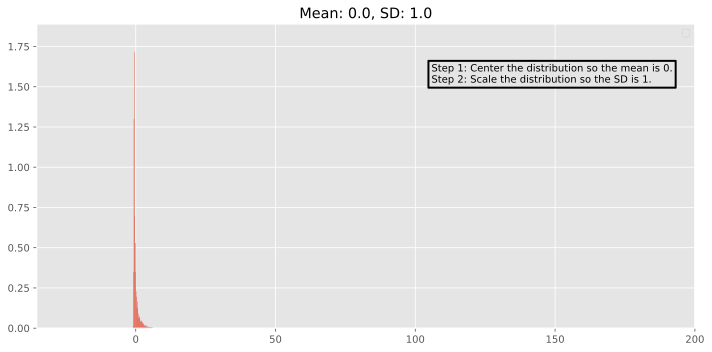

In [64]:
delay_anim = standardization_animation(delays.get('Delay'), x_max=200, dynamic_y=True, bins=47)
with open('data/delay_anim.html', 'w') as f:
    f.write(delay_anim)

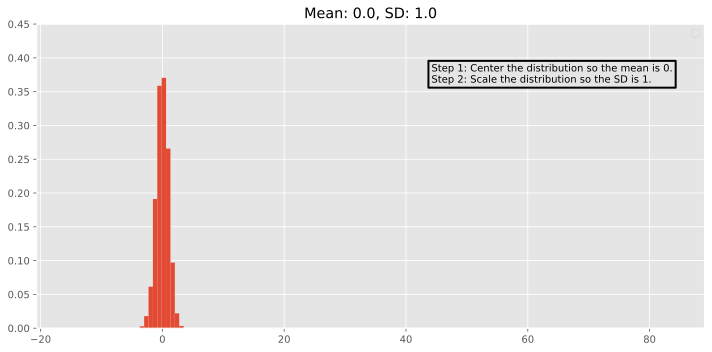

In [4]:
height_anim = standardization_animation(height_and_weight.get('Height'), dynamic_y=False)
with open('data/height_anim.html', 'w') as f:
    f.write(height_anim)

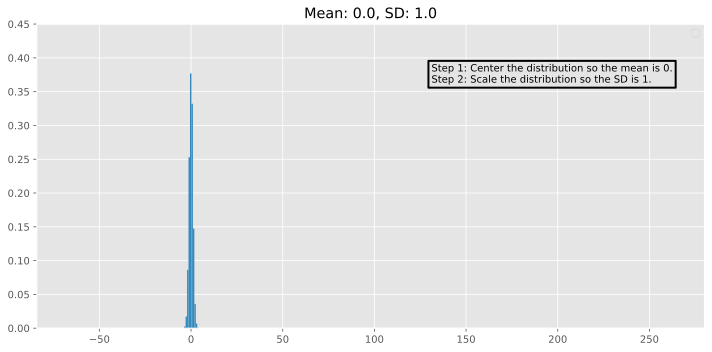

In [5]:
weight_anim = standardization_animation(height_and_weight.get('Weight'), color='C1', dynamic_y=False)
with open('data/weight_anim.html', 'w') as f:
    f.write(weight_anim)